# Jupyter + EC2

Recommended instance type: r4.2xlarge.

See this script for launching the instance and notebook: https://github.com/rikturr/aws-ml-experimenter/blob/master/experiments/jupyter.py

In [3]:
!pip install scipy==1.0.0

    100% |████████████████████████████████| 50.0MB 27kB/s  eta 0:00:01  8% |██▋                             | 4.1MB 64.8MB/s eta 0:00:01


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import sparse as sp
%matplotlib inline

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


# Download Data

Be nice to my wallet and only run this from an EC2 instance!

In [3]:
!aws s3 cp s3://rikturr/2015_partB.txt .

download: s3://rikturr/2015_partB.txt to ./2015_partB.txt          


In [2]:
import pandas as pd
df = pd.read_csv('2015_partB.txt', sep='\t')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploratory analysis

In [3]:
df.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
0,1,CPT copyright 2014 American Medical Associatio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99217,Hospital observation care discharge,N,23.0,23.0,23.0,72.680000,328.000000,54.502609,55.280870
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99219,Hospital observation care typically 50 minutes,N,18.0,18.0,18.0,135.850000,614.000000,100.958889,102.348889
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99221,"Initial hospital inpatient care, typically 30 ...",N,59.0,58.0,59.0,101.365085,333.288136,79.469661,80.859831
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99222,"Initial hospital inpatient care, typically 50 ...",N,132.0,130.0,132.0,139.010455,356.492424,107.933409,107.969621


In [4]:
df.shape

(9497892, 26)

In [5]:
provider_types = df['provider_type'].value_counts().reset_index()
provider_types.columns = ['provider_type', 'count']
provider_types

,provider_type,count
0,Diagnostic Radiology,1222851
1,Internal Medicine,1170216
2,Family Practice,972638
3,Cardiology,458508
4,Nurse Practitioner,418189
5,Orthopedic Surgery,309610
6,Physician Assistant,306141
7,Ophthalmology,240288
8,Anesthesiology,227378
9,Emergency Medicine,225408


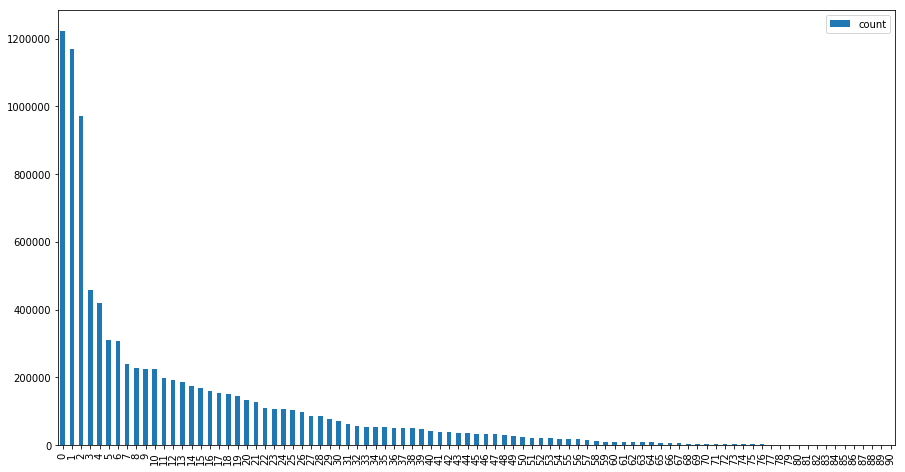

In [6]:
provider_types.plot(kind='bar', figsize=(15, 8))

# Create dataset for modeling

* take top 10 specialty types
* collapse place_of_service
* one-hot encoding
* save as scipy sparse matrix

In [7]:
top_type = provider_types[provider_types.index <= 10]
clean = (df[df['provider_type'].isin(top_type['provider_type'])]
         .groupby(['npi', 'provider_type', 'hcpcs_code'])['line_srvc_cnt'].sum()
         .reset_index())

In [8]:
clean.head()

,npi,provider_type,hcpcs_code,line_srvc_cnt
0,1003000126,Internal Medicine,99217,23.0
1,1003000126,Internal Medicine,99219,18.0
2,1003000126,Internal Medicine,99221,59.0
3,1003000126,Internal Medicine,99222,132.0
4,1003000126,Internal Medicine,99223,220.0


In [9]:
clean.shape

(5596950, 4)

In [10]:
one_hot = (clean
           .pivot_table(index=['npi', 'provider_type'], columns='hcpcs_code', values='line_srvc_cnt')
           .reset_index()
           .fillna(0))
one_hot['provider_type'] = one_hot['provider_type'].astype('category')

In [11]:
one_hot.shape

(516476, 4208)

In [12]:
one_hot.head()

hcpcs_code,npi,provider_type,00100,00102,00103,00104,00120,00126,00140,00142,...,Q9963,Q9965,Q9966,Q9967,Q9968,Q9969,Q9977,Q9979,V2632,V2785
0,1003000126,Internal Medicine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003000142,Anesthesiology,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003000407,Family Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003000522,Family Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1003000530,Internal Medicine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
lookup = one_hot[['npi', 'provider_type']]
lookup.head()

hcpcs_code,npi,provider_type
0,1003000126,Internal Medicine
1,1003000142,Anesthesiology
2,1003000407,Family Practice
3,1003000522,Family Practice
4,1003000530,Internal Medicine


In [21]:
lookup.to_csv('2015_partB_lookup.csv', index=False)

In [13]:
one_hot_matrix_df = one_hot.drop('npi', axis=1)
one_hot_matrix_df['provider_type'] = one_hot_matrix_df['provider_type'].cat.codes
one_hot_matrix = one_hot_matrix_df.values
'Size of matrix: {} GB'.format(one_hot_matrix.nbytes / 1024 / 1024 / 1024)

'Size of matrix: 16.18872979283333 GB'

In [23]:
one_hot_matrix.shape[0] * one_hot_matrix.shape[1]

2172814532

In [14]:
sparse = sp.csc_matrix(one_hot_matrix)
sparse

<516476x4207 sparse matrix of type '<class 'numpy.float64'>'
	with 6079528 stored elements in Compressed Sparse Column format>

In [15]:
sp.save_npz('2015_partB_sparse.npz', sparse)

# Save files to S3

Download notebook also

In [ ]:
!aws s3 cp 2015_partB_sparse.npz <DEST>
!aws s3 cp 2015_partB_lookup.csv <DEST>